This notebook purpose is to perform multiple analysis on the data concerning chess players using FIDE and chess.com datasets

## Libraries

We start off by loading some libraries, others will be loaded later in the notebook as they are more specific 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

Set the datasets paths

In [4]:
mappingsPath = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\mappings.csv"
playersPath = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\players.csv"
gamesPath = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\games.csv"
archive16Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2016.csv"
archive17Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2017.csv"
archive18Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2018.csv"
archive19Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2019.csv"
archive20Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2020.csv"
archive21Path = r"C:\Users\imade\Desktop\AE1\Fondations of Data Science\Datasets\2021.csv"

Load the datasets

In [5]:
mapping = pd.read_csv(mappingsPath)
player = pd.read_csv(playersPath)


In [6]:
#this is the biggest dataset, its better to load it alone
games = pd.read_csv(gamesPath)

In [7]:
archive16 = pd.read_csv(archive16Path)
archive17 = pd.read_csv(archive17Path)
archive18 = pd.read_csv(archive18Path)
archive19 = pd.read_csv(archive19Path)
archive20 = pd.read_csv(archive20Path)
archive21 = pd.read_csv(archive21Path)

This function returns the FIDE dataset of a specific player, and it creates a new "date" column merging the "year" and "month" columns.

In [8]:
def archive(fId):
    archive = pd.DataFrame()
    archive = archive.append(archive16.loc[archive16['fide_id'] == fId])
    archive = archive.append(archive17.loc[archive17['fide_id'] == fId])
    archive = archive.append(archive18.loc[archive18['fide_id'] == fId])
    archive = archive.append(archive19.loc[archive19['fide_id'] == fId])
    archive = archive.append(archive20.loc[archive20['fide_id'] == fId])
    archive = archive.append(archive21.loc[archive21['fide_id'] == fId])
    archive["date"] = archive["month"].astype(str) + archive["year"].astype(str)
    #we fix the format of the date as it will be usefull for plots 
    archive["date"]  = pd.to_datetime(archive["date"], format = "%m%Y")
    return archive

## find the youngest GM and WGM

We will be using the Year of birth column to to find the GM and WGM, after a first glance at the data it seems like they are some data missing, some players have 0 in there yob, but since we are looking for the youngest it won't affect our results.

We start of by getting the current year

In [9]:
import datetime
now = datetime.datetime.now().year
print(now)

2022


In [10]:
player


,fide_id,name,federation,gender,title,yob
0,100013,"Campora, Daniel H.",ARG,M,GM,1957
1,100021,"Quinteros, Miguel A.",ARG,M,GM,1947
2,100048,"Iapichello, Javier",ARG,M,NaN,1990
3,100064,"Schipper, Bernardo",ARG,M,NaN,2000
4,100072,"Adla, Diego",ARG,M,IM,1968
...,...,...,...,...,...,...
433383,651079542,"Teisseire, Armand",FRA,M,NaN,2006
433384,651080206,"Lagarenne, Tom",FRA,M,NaN,1994
433385,651081628,"Kratz, Jonathan",FRA,M,NaN,1988
433386,651081695,"Bar, Francois",FRA,M,NaN,1965


We filter the datasets by the title(gm and wgm) then we extract the gm and wgm by sorting the database by the year of birth column(yob), the first line is the youngest. 

In [11]:

gm = player.loc[(player.title == 'GM') & (player.gender == 'M')]

wgm = player.loc[(player.title == 'WGM') & (player.gender == 'F')]
#we sort the dataset by the yob column
gm = gm.sort_values(by='yob', ascending=False, na_position='first')
wgm = wgm.sort_values(by='yob', ascending=False, na_position='first')
#we substract the yob from the current year
ym = now - gm.iloc[0][5]
yf = now - wgm.iloc[0][5]
print(f'the youngest male player is {gm.iloc[0][1]}, he is {ym}')
print(f'the youngest female player is {wgm.iloc[0][1]}, she is {yf}')

the youngest male player is Gukesh D, he is 16
the youngest female player is Garifullina, Leya, she is 18


## Follow their career progress in term of rating to date

We first create a dataset by merging the data concerning the gamemaster in the archives using the function definied earlier.  

In [12]:
#GM
gmID = gm.iloc[0][0]
print(gmID)
    

archiveGM = archive(gm.iloc[0][0])
archiveWGM = archive(wgm.iloc[0][0])

46616543


We concatenate the two datasets as it make it easier for plotting using seaborn. we differentiate between the 2 players with the Players column

In [13]:
GMconcatenated = pd.concat([archiveGM.assign(Players=gm.iloc[0][1]), archiveWGM.assign(Players=wgm.iloc[0][1])])

In [14]:
GMconcatenated

,fide_id,year,month,rating_standard,rating_rapid,rating_blitz,date,Players
240562,46616543,2016,1,2041.0,1286.0,1619.0,2016-01-01,Gukesh D
490249,46616543,2016,2,2062.0,1286.0,1619.0,2016-02-01,Gukesh D
743303,46616543,2016,3,2095.0,1286.0,1619.0,2016-03-01,Gukesh D
1000814,46616543,2016,4,2095.0,1286.0,1619.0,2016-04-01,Gukesh D
1262175,46616543,2016,5,2061.0,1286.0,1619.0,2016-05-01,Gukesh D
...,...,...,...,...,...,...,...,...
5058057,34127035,2020,12,2348.0,2241.0,2259.0,2020-12-01,"Garifullina, Leya"
362922,34127035,2021,1,2394.0,2241.0,2259.0,2021-01-01,"Garifullina, Leya"
794293,34127035,2021,2,2375.0,2241.0,2259.0,2021-02-01,"Garifullina, Leya"
1226283,34127035,2021,3,2375.0,2241.0,2259.0,2021-03-01,"Garifullina, Leya"


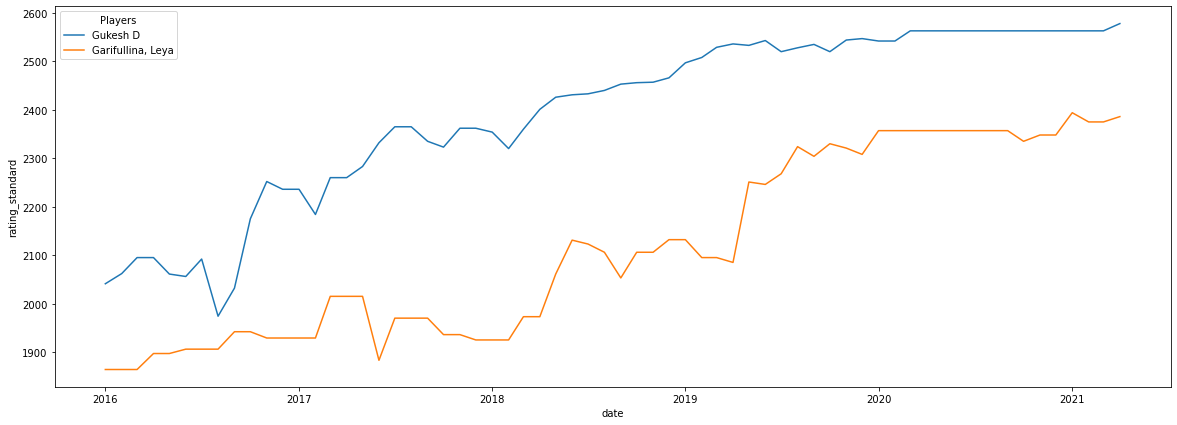

In [15]:
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
plt.figure(figsize=(20,7))
ax = sns.lineplot(x="date", y="rating_standard",hue='Players', data=GMconcatenated)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# the answer is here https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/
#it did really fix it omg

Looking at this chart, we can already make some assumptions. We can see that both players start off from different point in term of the rankings even with the wgm being the oldest she start off with a lower ranking, Despite this they have an almost similar evolution in their careers. We can also see that they both start stagnating in the beginning of 2020 which is interesting.

The wgm had a more fluctuations than the gm in term of ranking lets zoom on that. 

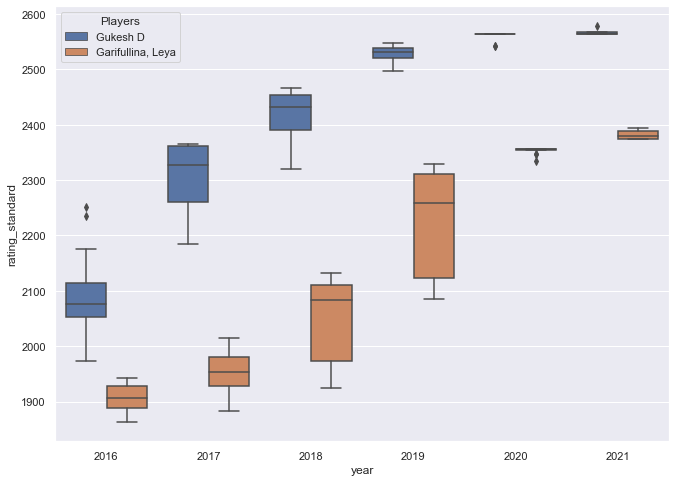

In [16]:
%matplotlib inline
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.boxplot(x="year", y="rating_standard", hue="Players", data=GMconcatenated)


This chart is intersting, as we can clearly see that the gm had a more straighforward evolution in his career, Indeed, the GM had a more significant progression at the beginning of his career, and he plateued in the latest years. On the contrary the wgm started of low, but then had the most significant growth in the middle of her career, then followed directly by a stagnation 

We are now going to focus more in the evolution month by month throughout each year. we start by creating a wider dataset with score from month to month.

In [16]:
x = archiveGM.groupby(["year", "month"])["rating_standard"].mean()
y = archiveWGM.groupby(["year", "month"])["rating_standard"].mean()
gm_wide = x.unstack()
wgm_wide = y.unstack()

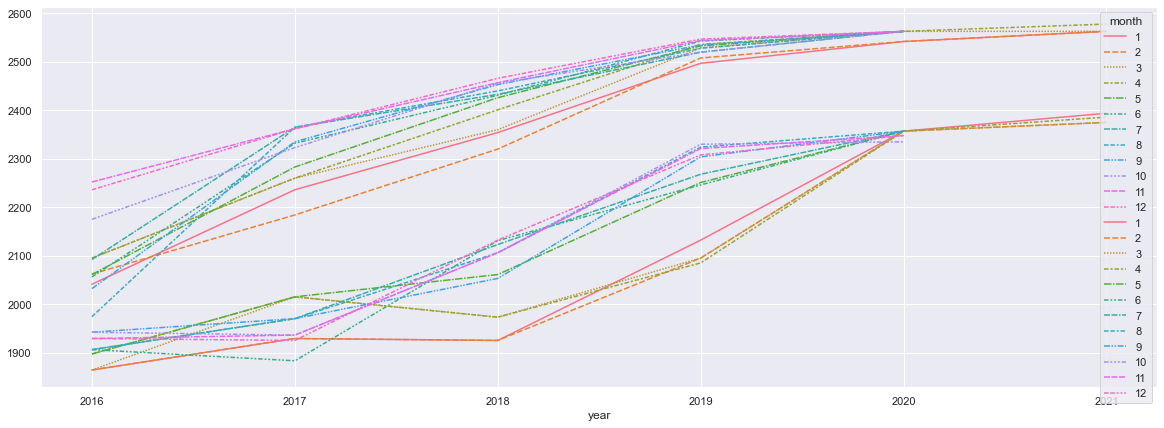

In [17]:
plt.figure(figsize=(20,7))
ax = sns.lineplot(data=gm_wide)
ay = sns.lineplot(data=wgm_wide)

This graph shows us that the player is at his lowest at the beginning of the year and even more so in the second month, then gradually improves as the year goes on.


## Rank the federation by the number of masters

We create a list of possible master titles

In [18]:
MasterTitles = ['GM','WGM','IM', 'WIM', 'FM', 'WFM', 'CM', 'WCM' ]

We use this list to create a dataset including only masters.

In [19]:
#we create this list by filtering the player dataset with the master titles list 
master = player.loc[player.title.isin(MasterTitles)]
master


,fide_id,name,federation,gender,title,yob
0,100013,"Campora, Daniel H.",ARG,M,GM,1957
1,100021,"Quinteros, Miguel A.",ARG,M,GM,1947
4,100072,"Adla, Diego",ARG,M,IM,1968
5,100080,"Bianchi, Guillermo",ARG,M,IM,1958
6,100102,"Cid, Marino Alejandro",ARG,M,IM,1958
...,...,...,...,...,...,...
429351,61400220,"Smith, Nathan",BAH,M,CM,2005
429533,73612251,"Kapicakova, Lucia",SVK,F,WCM,2007
429821,146242580,"Rifai, Abdulkader",SYR,M,CM,1983
429889,311214550,"Chan, Anthony",AUS,M,CM,1994


we then extract the number of masters by federation. We can either do it manually using a dictionary

In [22]:
data = list(master.federation.unique())
data = dict.fromkeys(data, 0)
for i in data:
    data[i] = master.federation.str.count(i).sum()
federation = pd.DataFrame(data=data,columns = ['federation','masters'])


Or by using the built in fuctions of pandas

In [20]:
# we simply calculate the number of each federation present in the federation column.
federation = master.federation.value_counts().to_frame(name = 'Masters')

In [21]:
# we reset the index column, because the index was the federation column by default and it make harder to access the data
federation = federation.reset_index().rename(columns ={'index': 'Federation'})

In [23]:
federation

,Federation,Masters
0,RUS,2616
1,GER,1459
2,USA,801
3,ESP,684
4,SRB,584
...,...,...
175,SOM,1
176,CPV,1
177,CAM,1
178,TLS,1


## We now display our result in a chart

<AxesSubplot:xlabel='Federation', ylabel='Masters'>

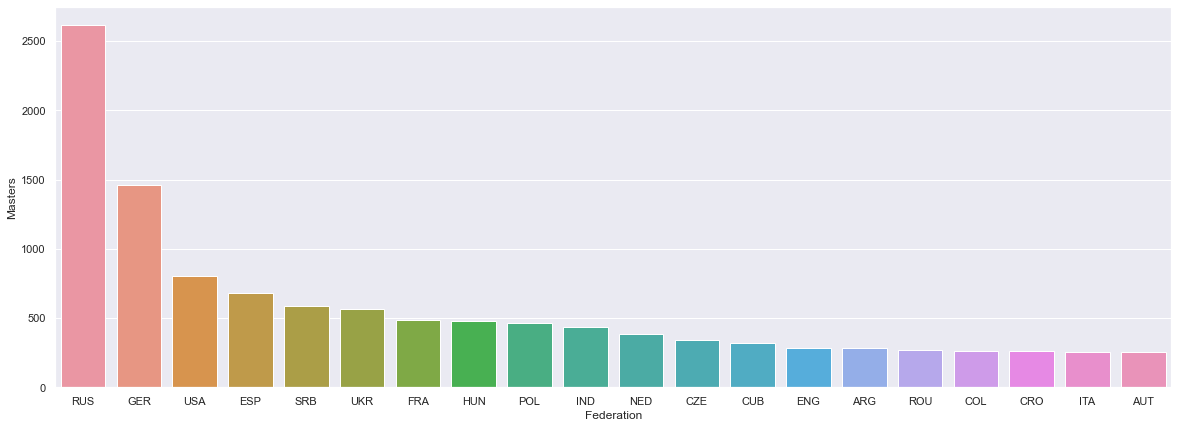

In [24]:
plt.figure(figsize=(20,7))
sns.barplot(x='Federation', y = 'Masters', data=federation.head(20))

The result is not surprising. Russia has the highest number of masters by far, almost twice more than the second in the rank Germany. Often when we hear about chess it usually russian players, this graph reflect that. 

Summarise (in other words, describe a distribution, its central tendency, variance and so on) all 2021 player ratings for the top-k federations found in 2.a). Compare and contrast the ranking of 2.a) and 2.b).

We merge FIDE dataset with the player dataset using the fide_id,

In [23]:
#We merge the dataset of the masters with the FIDE one. I suspect some duplicates do I drop them 
masters21 = pd.merge(archive21, master, how='inner', on='fide_id').drop_duplicates(subset = ['fide_id'])
masters21.sample(10)


,fide_id,year,month,rating_standard,rating_rapid,rating_blitz,name,federation,gender,title,yob
45128,4604660,2021,1,2243.0,NaN,2240.0,"Bartsch, Berthold",GER,M,FM,1953
70588,14504553,2021,1,2224.0,NaN,NaN,"Doncevic, Dario",CRO,M,IM,1958
76580,32018215,2021,1,2288.0,1980.0,2001.0,"Esquivias Quintero, Luis Manuel",ESP,M,FM,2000
16780,1303759,2021,1,2542.0,NaN,2482.0,"Lampert, Jonas",GER,M,GM,1997
66868,14104512,2021,1,2186.0,2113.0,2096.0,"Avanesov, Nikolay",UKR,M,FM,1949
37108,4135008,2021,1,2078.0,NaN,NaN,"Polovina, Elena",RUS,F,WFM,1979
15700,1203363,2021,1,2142.0,2413.0,2108.0,"Suba, Mihai",ESP,M,GM,1947
9380,900850,2021,1,2353.0,2342.0,2314.0,"Ristic, Nebojsa M",SRB,M,IM,1960
7908,727709,2021,1,2542.0,2500.0,2415.0,"Aczel, Gergely",HUN,M,GM,1991
44636,4602617,2021,1,2315.0,NaN,NaN,"Schmid, Guenter",GER,M,FM,1962


This is the most interesting part, we use Pandas prebuilt functions to create a description of the dataset

In [31]:
#we have to reset the index first as its all over the place due to the previous data manipulations.
#Then we group the data by federation and we then describe the result.
fed_21_desc = masters21[['federation', 'rating_standard']].reset_index().drop(['index'], axis=1).groupby('federation').describe()
fed_21_desc = fed_21_desc.sort_values(by=('rating_standard','count'), ascending = False )
#fed_21_desc = fed_21_desc.columns.droplevel()

In [32]:
fed_21_desc

rating_standard                                                   \
                     count         mean         std     min     25%     50%   
federation                                                                    
RUS                 2616.0  2272.851300  158.433943  1423.0  2175.0  2292.0   
GER                 1459.0  2276.380398  121.127442  1622.0  2214.0  2282.0   
USA                  801.0  2242.308365  228.731783  1187.0  2152.0  2284.0   
ESP                  684.0  2274.983918  133.562992  1821.0  2189.0  2285.0   
SRB                  584.0  2256.121575  124.171383  1897.0  2179.0  2260.0   
...                    ...          ...         ...     ...     ...     ...   
CAM                    1.0  2335.000000         NaN  2335.0  2335.0  2335.0   
BDI                    1.0  2217.000000         NaN  2217.0  2217.0  2217.0   
TLS                    1.0  1611.000000         NaN  1611.0  1611.0  1611.0   
SEN                    1.0  1783.000000         NaN  1783.0  1783.0  1783.0   
SOM                    1.0  1972.000000         NaN  1972.0  1972.0  1972.0   

                            
               75%     max  
federation                  
RUS         2370.0  2812.0  
GER         2342.0  2670.0  
USA         2383.0  2823.0  
ESP         2361.0  2710.0  
SRB         2329.0  2607.0  
...            ...     ...  
CAM         2335.0  2335.0  
BDI         2217.0  2217.0  
TLS         1611.0  1611.0  
SEN         1783.0  1783.0  
SOM         1972.0  1972.0  

[180 rows x 8 columns]

We are now gonna create a variance column into that dataframe, we do know that The variance is the standard deviation squared, and we have a standard deviation column already in that dataframe (std) we just have to square it for each federation. 

In [34]:
fed_21_desc['variance'] = np.sqrt(fed_21_desc[('rating_standard','std')])
fed_21_desc.head(20)

rating_standard                                                    \
                     count         mean         std     min      25%     50%   
federation                                                                     
RUS                 2616.0  2272.851300  158.433943  1423.0  2175.00  2292.0   
GER                 1459.0  2276.380398  121.127442  1622.0  2214.00  2282.0   
USA                  801.0  2242.308365  228.731783  1187.0  2152.00  2284.0   
ESP                  684.0  2274.983918  133.562992  1821.0  2189.00  2285.0   
SRB                  584.0  2256.121575  124.171383  1897.0  2179.00  2260.0   
UKR                  563.0  2304.303730  159.878251  1464.0  2204.00  2309.0   
FRA                  486.0  2289.635802  132.498563  1847.0  2219.00  2288.0   
HUN                  476.0  2255.970588  160.788057  1654.0  2162.75  2262.0   
POL                  464.0  2257.747845  180.230483  1337.0  2175.75  2278.5   
IND                  436.0  2230.355505  244.012888  1201.0  2112.75  2260.0   
NED                  385.0  2298.698701  132.296611  1859.0  2212.00  2296.0   
CZE                  345.0  2260.739130  143.499215  1816.0  2172.00  2273.0   
CUB                  321.0  2239.772586  155.463846  1763.0  2128.00  2264.0   
ENG                  287.0  2269.989547  157.471820  1691.0  2165.00  2289.0   
ARG                  286.0  2256.541958  169.601380  1354.0  2165.50  2278.5   
ROU                  270.0  2237.837037  169.348465  1660.0  2119.25  2267.0   
COL                  264.0  2073.416667  225.274469  1194.0  1962.75  2082.5   
CRO                  262.0  2266.461832  140.178063  1786.0  2179.00  2263.0   
ITA                  257.0  2265.805447  126.936750  1846.0  2191.00  2267.0   
AUT                  254.0  2254.078740  127.046635  1653.0  2185.25  2262.5   

                              variance  
                75%     max             
federation                              
RUS         2370.00  2812.0  12.587055  
GER         2342.00  2670.0  11.005791  
USA         2383.00  2823.0  15.123881  
ESP         2361.00  2710.0  11.556946  
SRB         2329.00  2607.0  11.143221  
UKR         2406.00  2699.0  12.644297  
FRA         2368.50  2784.0  11.510802  
HUN         2353.25  2759.0  12.680223  
POL         2370.00  2743.0  13.424995  
IND         2389.50  2753.0  15.620912  
NED         2383.00  2764.0  11.502026  
CZE         2349.00  2697.0  11.979116  
CUB         2334.00  2590.0  12.468514  
ENG         2380.00  2716.0  12.548778  
ARG         2364.50  2630.0  13.023109  
ROU         2353.50  2656.0  13.013396  
COL         2232.50  2512.0  15.009146  
CRO         2356.75  2652.0  11.839682  
ITA         2341.00  2617.0  11.266621  
AUT         2329.75  2680.0  11.271497

We display our results

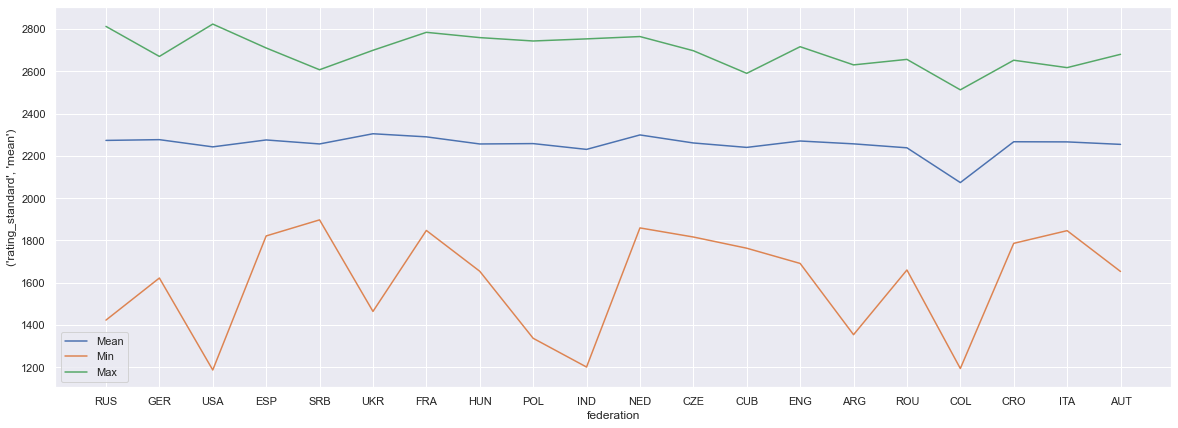

In [40]:
plt.figure(figsize=(20,7))
sns.lineplot(x="federation", y=('rating_standard','mean'), data=fed_21_desc.head(20))
sns.lineplot(x="federation", y=('rating_standard','min'), data=fed_21_desc.head(20))
sns.lineplot(x="federation", y=('rating_standard','max'), data=fed_21_desc.head(20))

plt.legend(labels=["Mean","Min","Max"])




**We now compare and contrast the ranking of 2.a) and 2.b).**<br> -Russia is not necessary performing better than the rest in the max despite having a much important number of players than any other federation. <br> -Almost all top 20 federations have the same mean except for coal, which has the lowest Min.  <br>- We see the most disparency of data in the Min with USA, IND and COL being the lowest. <br> -Col is interesting because it has one of the lowest number of players and its performing the worst in the min, max And the mean while AUT has a bit less players is one of the best performing federation. <br> My hypothesis is that there is no correlation between the performance and the number of masters. We can ask ourselves what makes a federation perform better, but we need a complete different set of data to answer that question

We finish off by correlating our result with the variance to highlight the disparencies, and as expected USA, IND and Col have the highest variance.

<AxesSubplot:label='0f6d5098-230c-48a4-a87f-255ff96438fe', xlabel='federation', ylabel='variance'>

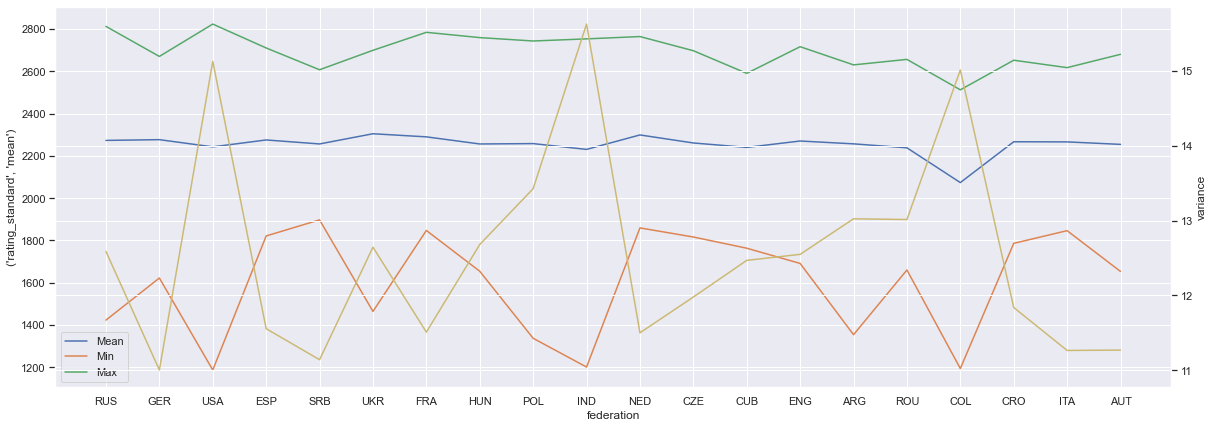

In [38]:
plt.figure(figsize=(20,7))
sns.lineplot(x="federation", y=('rating_standard','mean'), data=fed_21_desc.head(20))
sns.lineplot(x="federation", y=('rating_standard','min'), data=fed_21_desc.head(20))
sns.lineplot(x="federation", y=('rating_standard','max'), data=fed_21_desc.head(20))
plt.legend(labels=["Mean","Min","Max"])
ax2 = plt.twinx()
sns.lineplot(data=fed_21_desc.head(20), x="federation", y='variance',color="y", ax=ax2)
#sns.lineplot( data=fed_21_desc.head(20))

# Which WGM played most games with other WGMs? Sort them in descending order. 

We first reduce the number of data in the dataset

We filter the games before 2015 to match the FIDE dataset

In [42]:
res = games.loc[games.end_time >'2015-12-30 23:59:59' ]
res = res.sort_values(by = 'end_time')

We drop the duplicate games, as I expect there are some.

In [43]:
res = res.drop_duplicates(subset=['game_id'])

We get the list of WGM from the dataset

In [44]:
wgmListUserName = res.wgm_username.unique().tolist()

We create a dataset where only wgm played against other wgm

In [45]:
wgmVsWgm = res.loc[(res.white_username.str.lower().isin(wgmListUserName)) & (res.black_username.str.lower().isin(wgmListUserName))]

In [53]:
wgmVsWgm

,game_id,game_url,pgn,time_control,end_time,rated,time_class,rules,wgm_username,white_username,white_rating,white_result,black_username,black_rating,black_result
224380,1564247718,https://www.chess.com/live/game/1564247718,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2016-05-04 00:16:35,True,blitz,chess,wgm_adriana_nikolova,WGM_Adriana_Nikolova,2241,win,Fh2411,2267,resigned
115772,1567886216,https://www.chess.com/live/game/1567886216,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2016-05-06 22:26:23,True,bullet,chess,kungmongmanh,WGM_Adriana_Nikolova,2371,checkmated,kungmongmanh,2466,win
115773,1567893725,https://www.chess.com/live/game/1567893725,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2016-05-06 22:32:33,True,bullet,chess,kungmongmanh,kungmongmanh,2472,win,WGM_Adriana_Nikolova,2377,resigned
59591,1569671693,https://www.chess.com/live/game/1569671693,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2016-05-08 08:07:28,True,bullet,chess,camillab,jenshahade,2099,win,CamillaB,2107,resigned
60325,1596027573,https://www.chess.com/live/game/1596027573,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2016-05-29 05:54:42,True,bullet,chess,camillab,CamillaB,2121,win,jenshahade,2060,timeout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301367,6275629203,https://www.chess.com/live/game/6275629203,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2021-01-18 21:02:01,True,blitz,chess,nara_kh,Nara_Kh,2393,win,Sahara88,2376,resigned
299884,6343141126,https://www.chess.com/live/game/6343141126,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2021-01-25 16:43:54,True,bullet,chess,maili15,Maili15,2372,resigned,Samantha_Ross,2301,win
303479,6343151283,https://www.chess.com/live/game/6343151283,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2021-01-25 16:46:05,True,bullet,chess,samantha_ross,Samantha_Ross,2311,win,Maili15,2362,resigned
301081,6354979977,https://www.chess.com/live/game/6354979977,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+1,2021-01-26 18:40:27,True,blitz,chess,mirochka,Nemsko,2376,win,mirochka,2205,timeout


In [48]:
cond1 = res.white_username.str.lower().isin(wgmListUserName)
cond2 = res.black_username.str.lower().isin(wgmListUserName)
res['wgmvswgm'] = np.where(cond1 & cond2, 'WGM VS WGM', 'Normal game')

We can now already show our first results by highlighting the number of normal games versus the wgm against wgm, the result is that wgm vs wgm games represent an insignificant portion of the total games.

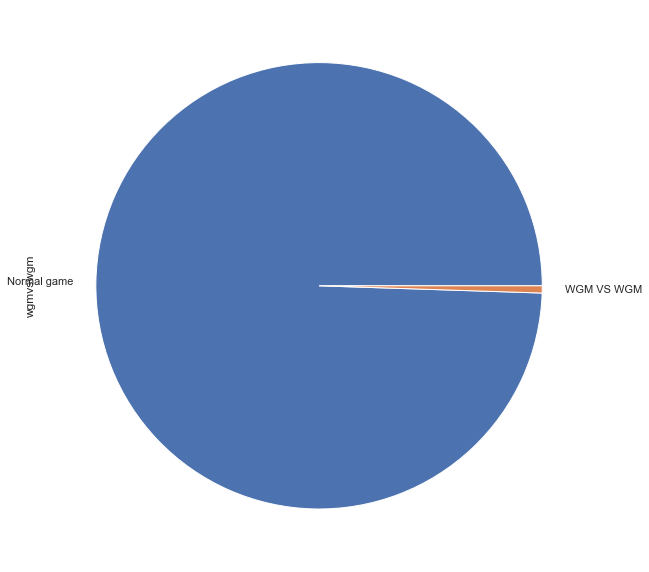

In [52]:
plot = res.wgmvswgm.value_counts().plot.pie(figsize=(10, 50),title=None)
#res.wgmvswgm.value_counts()
#res.loc[res.wgmvswgm == 'yes']

We check how many wgm vs wgm games there is.

In [99]:
len(wgmVsWgm)

1248

In [100]:
res

,game_id,game_url,pgn,time_control,end_time,rated,time_class,rules,wgm_username,white_username,white_rating,white_result,black_username,black_rating,black_result,wgmvswgm
159461,1404626625,https://www.chess.com/live/game/1404626625,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2015-12-31 02:45:42,True,blitz,chess,medalja,AlexandraThessa,1949,win,medalja,1888,timeout,no
159462,1404632949,https://www.chess.com/live/game/1404632949,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2015-12-31 02:51:43,True,blitz,chess,medalja,salto123,2045,win,medalja,1872,resigned,no
159463,1404639043,https://www.chess.com/live/game/1404639043,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2015-12-31 02:55:13,True,blitz,chess,medalja,medalja,1903,win,sofadeev,1959,checkmated,no
159464,1404642813,https://www.chess.com/live/game/1404642813,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2015-12-31 03:02:18,True,blitz,chess,medalja,medalja,1886,timeout,BLEDI12,2014,win,no
159465,1404650572,https://www.chess.com/live/game/1404650572,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180,2015-12-31 03:07:27,True,blitz,chess,medalja,BLEDI12,2003,resigned,medalja,1916,win,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302281,6412278494,https://www.chess.com/live/game/6412278494,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2021-02-01 04:51:06,True,bullet,chess,nemsko,Nemsko,2400,win,Toronto6ixx,2379,timeout,no
302282,6412314334,https://www.chess.com/live/game/6412314334,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2021-02-01 04:58:23,True,bullet,chess,nemsko,Nemsko,2392,timeout,dicuvich,2418,win,no
302283,6412327092,https://www.chess.com/live/game/6412327092,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,2021-02-01 04:59:25,True,bullet,chess,nemsko,Nemsko,2400,win,Jadoublewski,2372,abandoned,no
296970,6413016083,https://www.chess.com/live/game/6413016083,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",180+2,2021-02-01 07:29:23,True,blitz,chess,anjelina,tovarisc,2026,timeout,Anjelina,2095,win,no


We now extract the wgm that played the most against other wgm

Either manually by using a dictionary

In [56]:
#we first create 2 list from the white and black column
white = wgmVsWgm.white_username.str.lower().tolist()
black = wgmVsWgm.black_username.str.lower().tolist()
#we now simply count the number of element in black and white and then add them for each wgm
cpt = dict.fromkeys(wgmListUserName, 0)
for i in cpt:
    cpt[i] = white.count(i) + black.count(i)

In [102]:
cpt

{'medalja': 7,
 'camillab': 9,
 'wgm_adriana_nikolova': 57,
 'maili15': 21,
 'kungmongmanh': 105,
 'jmf24': 10,
 'olghita64': 6,
 'advantagelucy': 21,
 'crisfoisor': 0,
 'zefirka': 76,
 'fh2411': 23,
 'lexiel': 1,
 'katerina68': 0,
 'meoluoi91': 67,
 'kettichess': 0,
 'axvesik': 21,
 'musechka': 19,
 'jenshahade': 3,
 'budu44': 27,
 'betulcemreyildiz': 6,
 'ivavidenova': 0,
 'pomoc': 0,
 'sylvanaswindrunner': 0,
 'wgmcarlaheredia': 1,
 'ilzeberzina': 10,
 'olifantcz': 12,
 'ktsatsalashvili': 5,
 'chessterra87': 15,
 'ntmh281': 25,
 'jenia84': 67,
 'martinique24': 12,
 'iozefinapaulet': 0,
 'morshynska': 32,
 'josefineheinemann': 7,
 'lizasolovyova': 63,
 'govalya': 26,
 'ninomaisuradze': 0,
 'vitachulivska': 0,
 'xiaopang123': 5,
 'wgmanna': 3,
 'ticobello': 11,
 'kiranmanisha': 15,
 'thehappyfarmer': 7,
 'veranebolsina': 9,
 'jinbojinbo': 1,
 'onlytime4': 11,
 'winnie1989': 0,
 'sanda81': 0,
 'cukus': 74,
 'shata1974': 26,
 'kopeisk81': 7,
 'armqueen': 86,
 'irina_sudakova': 18,
 'zab

or by using pandas built in functions.

In [57]:

#We add the value count of black and white column
wgmGames = wgmVsWgm.white_username.value_counts() + wgmVsWgm.black_username.value_counts()
wgmGames = wgmGames.to_frame(name = 'Games')
# then we sort the values
wgmGames = wgmGames.reset_index().rename(columns ={'index': 'Wgm'}).sort_values(by='Games',ascending=False)


In [58]:
wgmGames

,Wgm,Games
108,kungmongmanh,105.0
0,ARMQUEEN,86.0
20,DinaBelenkaya,83.0
89,ZefirKa,76.0
95,cukus,74.0
...,...,...
112,lumi22,NaN
122,miupiu,NaN
126,pandazero,NaN
128,slowdumbb,NaN


**Now the time to visualize our result.** 

<AxesSubplot:xlabel='Wgm', ylabel='Games'>

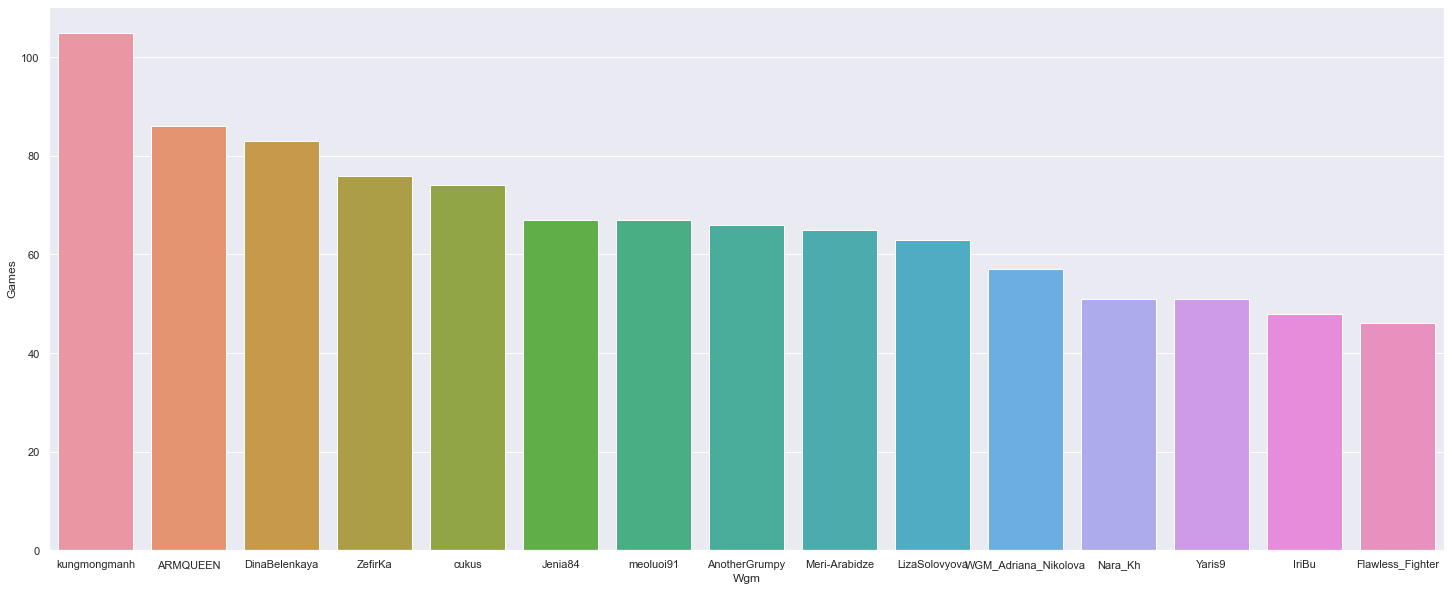

In [110]:
plt.figure(figsize=(25,10))
sns.barplot(x='Wgm', y = 'Games', data=wgmGames.head(15))

Kungmongmanh is the player that played the most against other wgm followed closely by ARMQUEEN, We can maybe expect that they have the most games together. We will see if that is true in the next part. 

In [67]:
#we first merge all the wgm games in one column by the name of each wgm
wgmVsWgmGames = set(zip(white,black))

In [68]:
tup = tuple(zip(white,black))
tup= [tuple(sorted(sub)) for sub in tup]
len(tup)

1248

We now have duo of wgm in one column we just have to count them.

In [74]:
wgmVsWgmGames = pd.Series(tup).to_frame('Players').value_counts().to_frame('Games')
#test['Games'] = np.nan

We reset the index because it was the Players column by default

In [76]:
wgmVsWgmGames = wgmVsWgmGames.reset_index()

In [77]:
wgmVsWgmGames

,Players,Games
0,"(kungmongmanh, lizasolovyova)",38
1,"(armqueen, keti_chess)",25
2,"(anothergrumpy, armqueen)",20
3,"(kungmongmanh, wgm_adriana_nikolova)",19
4,"(cukus, kungmongmanh)",19
...,...,...
742,"(dariavoit, ole83)",1
743,"(dariavoit, thehappyfarmer)",1
744,"(dariavoit, xuyuanyuan)",1
745,"(dariavoit, yennefer1)",1


We try if our result is true with a manual test.

In [28]:
#test = test.value_counts().to_frame()
cpt = 0
for i,j in zip(black,white):
     if (i == 'kungmongmanh' and j == 'lizasolovyova') or (i == 'lizasolovyova' and j == 'kungmongmanh'):
        cpt = cpt + 1 
print(cpt)
    
    

38


What we can say so far is that our assumption was not true, kungmongmanh and armqueen did not have the most games togheter, but they are respectevly first and second in term of games played against the same wgm, which confirm our previous results

We now going to analyse the first  pair in term of rating 

In [130]:
wgmVsWgmGames['Players'][0][0]

'kungmongmanh'

We extract the id of each wgm from the mapping dataset to get the fid as it will be used to look up the wgm in the FIDE dataset.

In [132]:
r = mapping[mapping['username'] == wgmVsWgmGames['Players'][0][0]]['fid'].values[0]
r

12401838

In [123]:
P1 = archive(mapping[mapping['username'] == wgmVsWgmGames['Players'][0][0]]['fid'].values[0])
P2 = archive(mapping[mapping['username'] == wgmVsWgmGames['Players'][0][1]]['fid'].values[0])

In [124]:
P2

,fide_id,year,month,rating_standard,rating_rapid,rating_blitz,date
166443,14117665,2016,1,2308.0,2305.0,2235.0,2016-01-01
414287,14117665,2016,2,2308.0,2305.0,2235.0,2016-02-01
665680,14117665,2016,3,2308.0,2305.0,2235.0,2016-03-01
920742,14117665,2016,4,2308.0,2305.0,2235.0,2016-04-01
1180167,14117665,2016,5,2308.0,2305.0,2235.0,2016-05-01
...,...,...,...,...,...,...,...
4939757,14117665,2020,12,2281.0,2222.0,2142.0,2020-12-01
244446,14117665,2021,1,2281.0,2222.0,2142.0,2021-01-01
675732,14117665,2021,2,2281.0,2222.0,2142.0,2021-02-01
1107604,14117665,2021,3,2281.0,2222.0,2142.0,2021-03-01


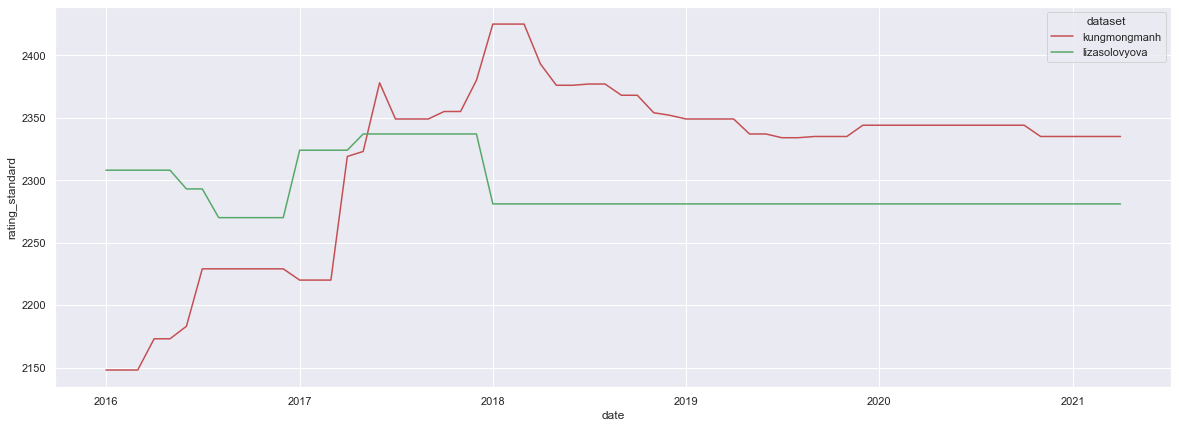

In [129]:
concatenated = pd.concat([P1.assign(dataset=wgmVsWgmGames['Players'][0][0]), P2.assign(dataset=wgmVsWgmGames['Players'][0][1])])
plt.figure(figsize=(20,7))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax = sns.lineplot(data=concatenated, y='rating_standard', x ='date',hue='dataset',palette=['r','g'])


The result is suprising, Despite being ranked lower in term of ratings in 2016, kungmongmanh managed to make a much bigger growth specially in 2017 and then peaked in 2018 followed by a small decline then a stagnation, lizasolvyova have a much more stable evolution therefor we can see from this data that a player that started off in a low ranking managed to outperform and a more higher ranked player but right after surpassing her, her rank stagnates.Their rivalery shows in the data.

## A final note

In this notebook I focused more on the standard rating, I did not take into consideration the other type of games, therefor i feel like we might be missing some insights, and we might draw the wrong conclusion too hastily, specially when analyis the results by federation, this gets even more dangerous if we compare male and women masters ranking, as we can come up with problematic assumptions, that is why i feel like its necessary to clearly state out the purpose of the analysis beforehand and work with the proper data.In the case where we find an unexpected result in the final results, instead of making an assumption about it, we should try to work on it from a different angle or even considered working on a different set of data